Exercises

**Problem 2.1:**

Use Ridge regression to solve the regression problem in Example 2.1 as well as the classification problem in Example 2.2, also implement both closed-form and iterative approachs, compare the results of Ridge regression with those of linear regression.

***L2 regularization Redge Regression Using Closed-form approach:***


In [1]:
#link my Google drive

from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# load Boston House data set
import pandas as pd
import numpy as np

raw_data = pd.read_csv('/drive/My Drive/machine Learning/boston.csv', header=None)
data_rows = np.reshape(raw_data.to_numpy(), (506,14))
data = data_rows[:,:13]
target = data_rows[:,13]

# normalize input features to zero-mean and unit-variance
data = (data-np.mean(data, axis=0))/np.std(data, axis=0) 

print(data.shape)
print(target.shape)

(506, 13)
(506,)


In [ ]:
# with alpha=1
# add a constant column of '1' to accomodate the bias 
alpha = 1
data_wb = np.hstack((data, np.ones((data.shape[0], 1), dtype=data.dtype)))

print(data_wb.shape)
n, m = data_wb.shape
I = np.identity(m)

# refer to the closed-form solution
w = np.dot(np.dot(np.linalg.inv(np.dot(data_wb.T, data_wb) + alpha * I), data_wb.T), target)


# calculate the mean square error in the training set
predict = data_wb @ w 
# error = (np.sum(((predict - target)**2)/data.shape[0]))+((alpha*w)/data.shape[0])
error = (np.sum((predict - target)*(predict - target))/data.shape[0])
ERROR=error

print(f'mean square error for the closed-form solution: {ERROR:.3f}')

(506, 14)
mean square error for the closed-form solution: 21.898


In [ ]:
# with alpha=3
# add a constant column of '1' to accomodate the bias 
alpha = 0.1
data_wb = np.hstack((data, np.ones((data.shape[0], 1), dtype=data.dtype)))

print(data_wb.shape)
n, m = data_wb.shape
I = np.identity(m)

# refer to the closed-form solution
w = np.dot(np.dot(np.linalg.inv(np.dot(data_wb.T, data_wb) + alpha * I), data_wb.T), target)


# calculate the mean square error in the training set
predict = data_wb @ w 
# error = (np.sum(((predict - target)**2)/data.shape[0]))+((alpha*w)/data.shape[0])
error = (np.sum((predict - target)*(predict - target))/data.shape[0])

print(f'mean square error for the closed-form solution: {error:.3f}')

(506, 14)
mean square error for the closed-form solution: 21.895


***Solve Redge regression using gradient descent***


In [ ]:
# solve Redge regression using gradient descent 
import numpy as np

class Optimizer():
  def __init__(self,lr, annealing_rate, batch_size, max_epochs):
    self.lr = lr
    self.annealing_rate = annealing_rate
    self.batch_size = batch_size
    self.max_epochs = max_epochs

# X[N,d]: input features; y[N]: output targets; op: hyper-parameters for optimzer 
def redge_regression_gd(X, y, op,alpha):
  n = X.shape[0]   # number of samples
  w = np.zeros(X.shape[1])  # initialization

  lr = op.lr
  n, m = data_wb.shape
  I = np.identity(m)
  errors = np.zeros(op.max_epochs)
  for epoch in range(op.max_epochs):
    indices = np.random.permutation(n)  #randomly shuffle data indices
    for batch_start in range(0, n, op.batch_size):
      X_batch = X[indices[batch_start:batch_start + op.batch_size]]
      y_batch = y[indices[batch_start:batch_start + op.batch_size]]

      # vectorization to compute gradients for a whole mini-batch (see the above formula)
      w_grad = np.dot(np.dot(np.linalg.inv(np.dot(X_batch.T, X_batch) + alpha * I), X_batch.T), y_batch )
      

      w -= lr * w_grad / X_batch.shape[0]

    diff = X @ w - y  # prediction difference
    errors[epoch] = np.sum(diff*diff)/n
    lr *= op.annealing_rate
    #print(f'epoch={epoch}: the mean square error is {errors[epoch]}')

  return w, errors

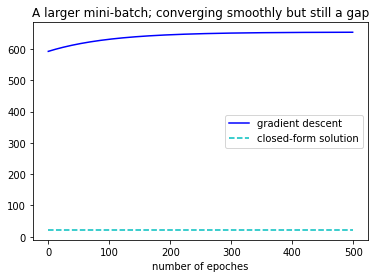

In [ ]:
import matplotlib.pyplot as plt

op = Optimizer(lr=0.001, annealing_rate=0.99, batch_size=30, max_epochs=500)
alpha=1
w, errors = redge_regression_gd(data_wb, target, op,alpha)

plt.title('A larger mini-batch; converging smoothly but still a gap')
plt.xlabel('number of epoches')
plt.plot(errors, 'b', 21.89*np.ones(errors.shape[0]), 'c--')
plt.legend(['gradient descent', 'closed-form solution'])

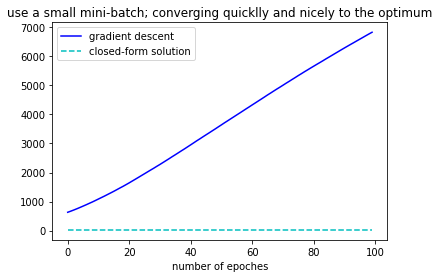

In [ ]:
import matplotlib.pyplot as plt

op = Optimizer(lr=0.001, annealing_rate=0.99, batch_size=2, max_epochs=100)
alpha=0.1
w, errors = redge_regression_gd(data_wb, target, op,alpha)

plt.title('use a small mini-batch; converging quicklly and nicely to the optimum')
plt.xlabel('number of epoches')
plt.plot(errors, 'b', 21.89*np.ones(errors.shape[0]), 'c--')
plt.legend(['gradient descent', 'closed-form solution'])

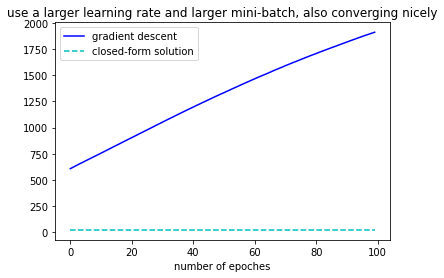

In [ ]:
import matplotlib.pyplot as plt

op = Optimizer(lr=0.01, annealing_rate=0.99, batch_size=20, max_epochs=100)
alpha=0.01
w, errors = redge_regression_gd(data_wb, target, op,alpha)

plt.title('use a larger learning rate and larger mini-batch, also converging nicely')
plt.xlabel('number of epoches')
plt.plot(errors, 'b', 21.89*np.ones(errors.shape[0]), 'c--')
plt.legend(['gradient descent', 'closed-form solution'])

## **LASSO** **REGRESSION** 

In general, the LASSO lacks a closed form solution because the objective function is not ***differentiable***. However, it is possible to obtain closed form solutions for the special case of an orthonormal design matrix

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_wb,target, test_size=0.3, random_state=10)

At Different Alpha Values

In [ ]:
#at alpha=1
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training Dataset', round(mse_train, 4))
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test Dataset', round(mse_test, 4))

MSE training Dataset 26.1797
MSE test Dataset 34.853


In [ ]:
#at alpha=0.1
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
reg = Lasso(alpha=0.1)
reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 4))
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 4))

MSE training set 19.94
MSE test set 29.25


lasso regression having less ERRORS with better alpha

In [ ]:
#at alpha=0.01
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
reg = Lasso(alpha=0.01)
reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 4))
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 4))

MSE training set 19.4649
MSE test set 29.2632


### **Problem 2.2:**

Use LASSO to solve the regression problem in Example 2.1 as well as the classification problem in Example 2.2, compare the results of LASSO with those of linear regression and Ridge regression.



In [2]:
!pip install python_mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from mnist import MNIST
import numpy as np

mnist_loader = MNIST('/drive/My Drive/Colab Notebooks/MNIST')
train_data, train_label = mnist_loader.load_training()
test_data, test_label = mnist_loader.load_testing()
train_data = np.array(train_data, dtype='float')/255 # norm to [0,1]
train_label = np.array(train_label, dtype='short')
test_data = np.array(test_data, dtype='float')/255 # norm to [0,1]
test_label = np.array(test_label, dtype='short')

#add small random noise to avoid matrix singularity
train_data += np.random.normal(0,0.0001,train_data.shape) 

print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [4]:
# prepare digits '3' and '8' for Redge regression

digit_train_index = np.logical_or(train_label == 3, train_label == 8)
X_train = train_data[digit_train_index]
y_train = train_label[digit_train_index]
digit_test_index = np.logical_or(test_label == 3, test_label == 8)
X_test = test_data[digit_test_index]
y_test = test_label[digit_test_index]

# add a constant column of '1' to accomodate the bias (see the margin note on page 107)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1), dtype=X_test.dtype)))

# convert labels: '3' => -1, '8' => +1
CUTOFF = 5 # any number between '3' and '8'
y_train = np.sign(y_train-CUTOFF)
y_test = np.sign(y_test-CUTOFF)

print(X_train.shape)
print(y_train)

print(X_test.shape)
print(y_test)

(11982, 785)
[-1 -1 -1 ...  1 -1  1]
(1984, 785)
[-1 -1 -1 ... -1  1 -1]


**Redge regression using different alpha values**


In [5]:
# use the closed-form solution
alpha=1
n, m = X_train.shape
I = np.identity(m)
# refer to the closed-form solution, i.e. Eq.(6.9) on page 112
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + alpha * I), X_train.T), y_train)

# calculate the mean square error and classification accuracy on the training set
predict = X_train @ w 
error = np.sum((predict - y_train)*(predict - y_train))/X_train.shape[0]
print(f'mean square error on training data for the closed-form solution: {error:.5f}')

accuracy = np.count_nonzero(np.equal(np.sign(predict),y_train))/y_train.size*100.0
print(f'classification accuracy on training data for the closed-form solution: {accuracy:.2f}%')

# calculate the mean square error and classification accuracy on the test set
predict = X_test @ w 
error = np.sum((predict - y_test)*(predict - y_test))/X_test.shape[0]
print(f'mean square error on test data for the closed-form solution: {error:.5f}')

accuracy = np.count_nonzero(np.equal(np.sign(predict),y_test))/y_test.size*100.0
print(f'classification accuracy on test data for the closed-form solution: {accuracy:.2f}%')

mean square error on training data for the closed-form solution: 0.20013
classification accuracy on training data for the closed-form solution: 96.79%
mean square error on test data for the closed-form solution: 0.22014
classification accuracy on test data for the closed-form solution: 96.02%


In [6]:
alpha=0.1
n, m = X_train.shape
I = np.identity(m)
# refer to the closed-form solution, i.e. Eq.(6.9) on page 112
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + alpha * I), X_train.T), y_train)


# calculate the mean square error and classification accuracy on the training set
predict = X_train @ w 
error = np.sum((predict - y_train)*(predict - y_train))/X_train.shape[0]
print(f'mean square error on training data for the closed-form solution: {error:.5f}')

accuracy = np.count_nonzero(np.equal(np.sign(predict),y_train))/y_train.size*100.0
print(f'classification accuracy on training data for the closed-form solution: {accuracy:.2f}%')

# calculate the mean square error and classification accuracy on the test set
predict = X_test @ w 
error = np.sum((predict - y_test)*(predict - y_test))/X_test.shape[0]
print(f'mean square error on test data for the closed-form solution: {error:.5f}')

accuracy = np.count_nonzero(np.equal(np.sign(predict),y_test))/y_test.size*100.0
print(f'classification accuracy on test data for the closed-form solution: {accuracy:.2f}%')

mean square error on training data for the closed-form solution: 0.19932
classification accuracy on training data for the closed-form solution: 96.83%
mean square error on test data for the closed-form solution: 0.22396
classification accuracy on test data for the closed-form solution: 95.97%


 **solve Redge regression using gradient descent**

In [9]:
# solve Redge regression using gradient descent 
import numpy as np

class Optimizer():
  def __init__(self, lr, annealing_rate, batch_size, max_epochs,lamda):
    self.lr = lr
    self.annealing_rate = annealing_rate
    self.batch_size = batch_size
    self.max_epochs = max_epochs
    self.lamda=lamda

# X[N,d]: training features; y[N]: training targets; 
# X2[N,d]: test features; y2[N]: test targets;  
# op: hyper-parameters for optimzer 
#
# Note: X2 and y2 are not used in training
#       but only for computting the learning curve B
#
def redge_regression_gd2(X, y, X2, y2, op):
  n = X.shape[0]   # number of samples
  w = np.zeros(X.shape[1])  # initialization

  lr = op.lr
  n, m = X_train.shape
  I = np.identity(m)
  alpha=op.lamda
  errorsA = np.zeros(op.max_epochs)
  errorsB = np.zeros(op.max_epochs)
  errorsC = np.zeros(op.max_epochs)

  for epoch in range(op.max_epochs):
    indices = np.random.permutation(n)  #randomly shuffle data indices
    for batch_start in range(0, n, op.batch_size):
      X_batch = X[indices[batch_start:batch_start + op.batch_size]]
      y_batch = y[indices[batch_start:batch_start + op.batch_size]]
      

      # vectorization to compute gradients for a whole mini-batch (see the above formula)
    
      w_grad = np.dot(np.dot(np.linalg.inv(np.dot(X_batch.T, X_batch) + alpha * I), X_batch.T), y_batch )

      w -= lr * w_grad / X_batch.shape[0] 

    # for learning curve C
    diff = X @ w - y  # prediction difference
    errorsC[epoch] = np.sum(diff*diff)/n   

    # for learning curve A
    predict = np.sign(X @ w)
    errorsA[epoch] = np.count_nonzero(np.equal(predict,y))/y.size 

    # for learning curve B
    predict2 = np.sign(X2 @ w)
    errorsB[epoch] = np.count_nonzero(np.equal(predict2,y2))/y2.size

    lr *= op.annealing_rate
    print(f'epoch={epoch}: the mean square error is {errorsC[epoch]:.3f} ({errorsA[epoch]:.3f},{errorsB[epoch]:.3f})')

  return w, errorsA, errorsB, errorsC

epoch=0: the mean square error is 1.007 (0.049,0.042)
epoch=1: the mean square error is 1.013 (0.049,0.041)
epoch=2: the mean square error is 1.020 (0.049,0.040)
epoch=3: the mean square error is 1.026 (0.049,0.040)
epoch=4: the mean square error is 1.032 (0.049,0.040)
epoch=5: the mean square error is 1.039 (0.049,0.040)
epoch=6: the mean square error is 1.045 (0.049,0.040)
epoch=7: the mean square error is 1.051 (0.049,0.040)
epoch=8: the mean square error is 1.058 (0.050,0.040)
epoch=9: the mean square error is 1.064 (0.049,0.040)
epoch=10: the mean square error is 1.070 (0.049,0.040)
epoch=11: the mean square error is 1.076 (0.049,0.040)
epoch=12: the mean square error is 1.082 (0.049,0.040)
epoch=13: the mean square error is 1.088 (0.049,0.040)
epoch=14: the mean square error is 1.094 (0.049,0.040)
epoch=15: the mean square error is 1.100 (0.049,0.040)
epoch=16: the mean square error is 1.106 (0.049,0.040)
epoch=17: the mean square error is 1.112 (0.049,0.040)
epoch=18: the mean s

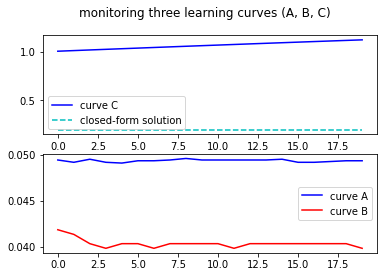

In [12]:
import matplotlib.pyplot as plt

op = Optimizer(lr=0.001, annealing_rate=0.99, batch_size=50, max_epochs=20,lamda=1)
alpha=1
w, A, B, C = redge_regression_gd2(X_train, y_train, X_test, y_test, op)

fig, ax = plt.subplots(2)
fig.suptitle('monitoring three learning curves (A, B, C)')
ax[0].plot(C, 'b', 0.196*np.ones(C.shape[0]), 'c--')
ax[0].legend(['curve C', 'closed-form solution'])

ax[1].plot(A, 'b', B, 'r')
ax[1].legend(['curve A', 'curve B'])

epoch=0: the mean square error is 1.007 (0.049,0.040)
epoch=1: the mean square error is 1.013 (0.049,0.040)
epoch=2: the mean square error is 1.020 (0.049,0.040)
epoch=3: the mean square error is 1.026 (0.049,0.040)
epoch=4: the mean square error is 1.033 (0.048,0.040)
epoch=5: the mean square error is 1.039 (0.049,0.040)
epoch=6: the mean square error is 1.046 (0.049,0.039)
epoch=7: the mean square error is 1.052 (0.049,0.039)
epoch=8: the mean square error is 1.058 (0.049,0.039)
epoch=9: the mean square error is 1.065 (0.049,0.039)
epoch=10: the mean square error is 1.071 (0.049,0.039)
epoch=11: the mean square error is 1.077 (0.049,0.040)
epoch=12: the mean square error is 1.083 (0.049,0.040)
epoch=13: the mean square error is 1.089 (0.049,0.040)
epoch=14: the mean square error is 1.095 (0.049,0.039)
epoch=15: the mean square error is 1.102 (0.049,0.040)
epoch=16: the mean square error is 1.108 (0.049,0.040)
epoch=17: the mean square error is 1.113 (0.049,0.040)
epoch=18: the mean s

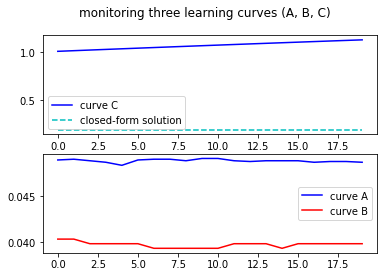

In [14]:
import matplotlib.pyplot as plt

op = Optimizer(lr=0.001, annealing_rate=0.99, batch_size=50, max_epochs=20,lamda=0.1)
alpha=0.1
w, A, B, C = redge_regression_gd2(X_train, y_train, X_test, y_test, op)

fig, ax = plt.subplots(2)
fig.suptitle('monitoring three learning curves (A, B, C)')
ax[0].plot(C, 'b', 0.196*np.ones(C.shape[0]), 'c--')
ax[0].legend(['curve C', 'closed-form solution'])

ax[1].plot(A, 'b', B, 'r')
ax[1].legend(['curve A', 'curve B'])

**LASSO REGRESSION**

In [15]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training Dataset', round(mse_train, 4))
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test Dataset', round(mse_test, 4))

MSE training Dataset 0.9995
MSE test Dataset 0.9997


In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
reg = Lasso(alpha=0.1)
reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training Dataset', round(mse_train, 4))
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test Dataset', round(mse_test, 4))

MSE training Dataset 0.4897
MSE test Dataset 0.4902
